In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20.0, 10.0)
%matplotlib inline

data = pd.read_csv('./headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
# Collecting X and Y
x = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

In [5]:
mean_x = np.mean(x)
mean_y = np.mean(y)

n = len(x)

In [7]:
numer = 0
denom = 0
for i in range(n):
    numer += (x[i] - mean_x) * (y[i] - mean_y)
    denom += (x[i] - mean_x) ** 2

b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

print(b1, b0)

0.26342933948939945 325.57342104944223


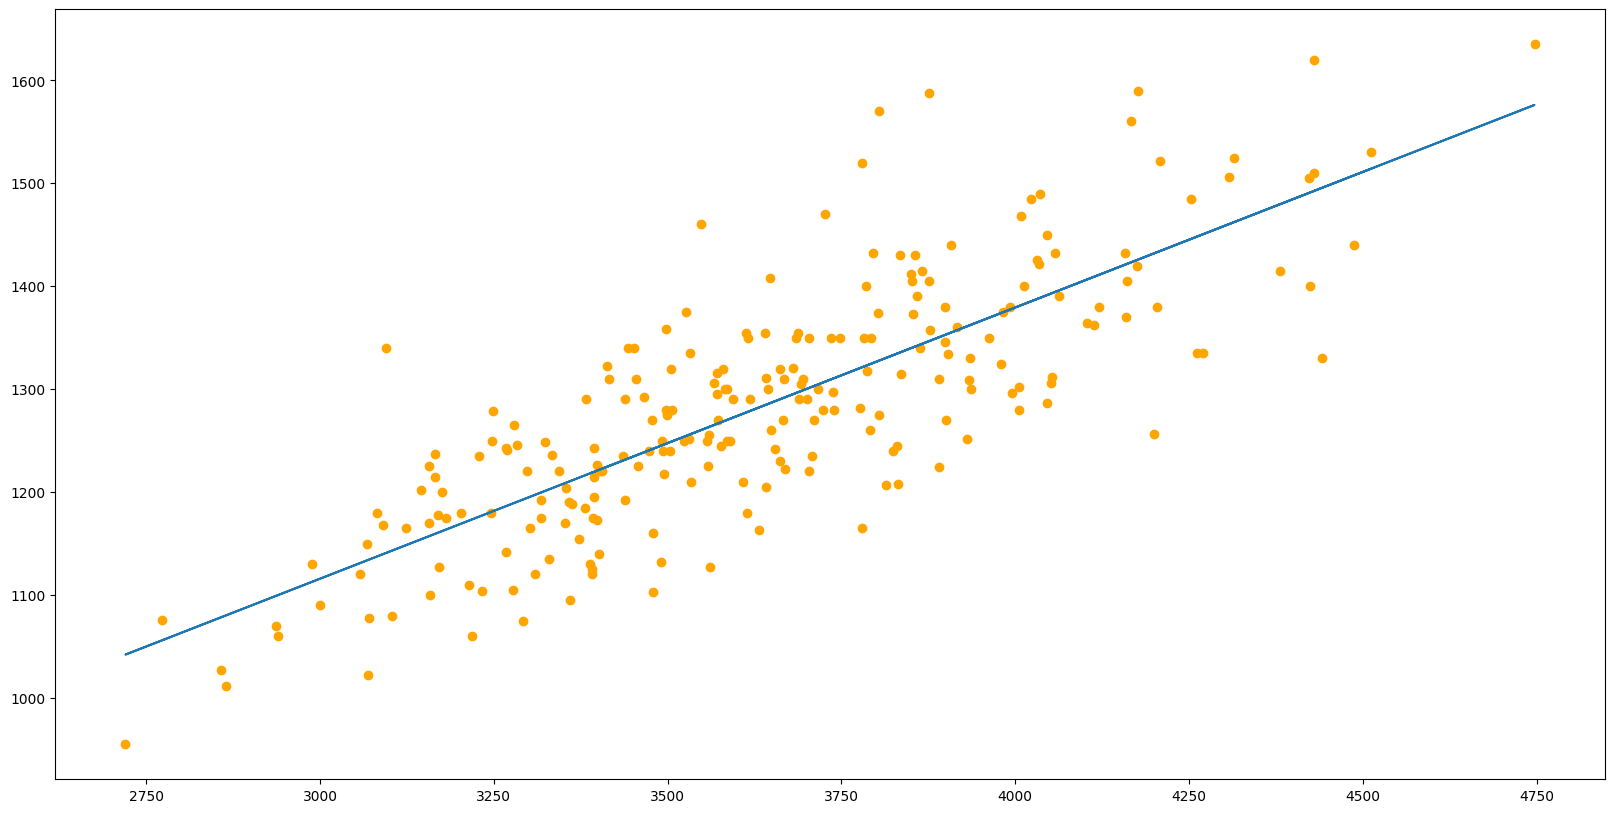

In [22]:
y_preds = []
for i in range(n):
    y_preds.append(b1 * x[i] + b0)

y_preds = np.array(y_preds)
y_preds

plt.plot(x, y_preds)
plt.scatter(x, y, c='orange')
plt.show()


In [25]:
# 求R Score 误差
ss_t = 0
ss_r = 0
for i in range(n):
    y_pred = b0 + b1*x[i]
    ss_t += (y[i] - mean_y) ** 2
    ss_r += (y_pred - mean_y) ** 2

r2 = ss_r / ss_t
print(r2)

0.6393117199570001


# 使用sklearn 进行线性回归

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Scikitlearn 必须使用二维特征
x = x.reshape((n, 1))
reg = LinearRegression()
reg = reg.fit(x, y)
y_pred = reg.predict(x)

r2_score = reg.score(x, y)

print(r2_score)

0.639311719957


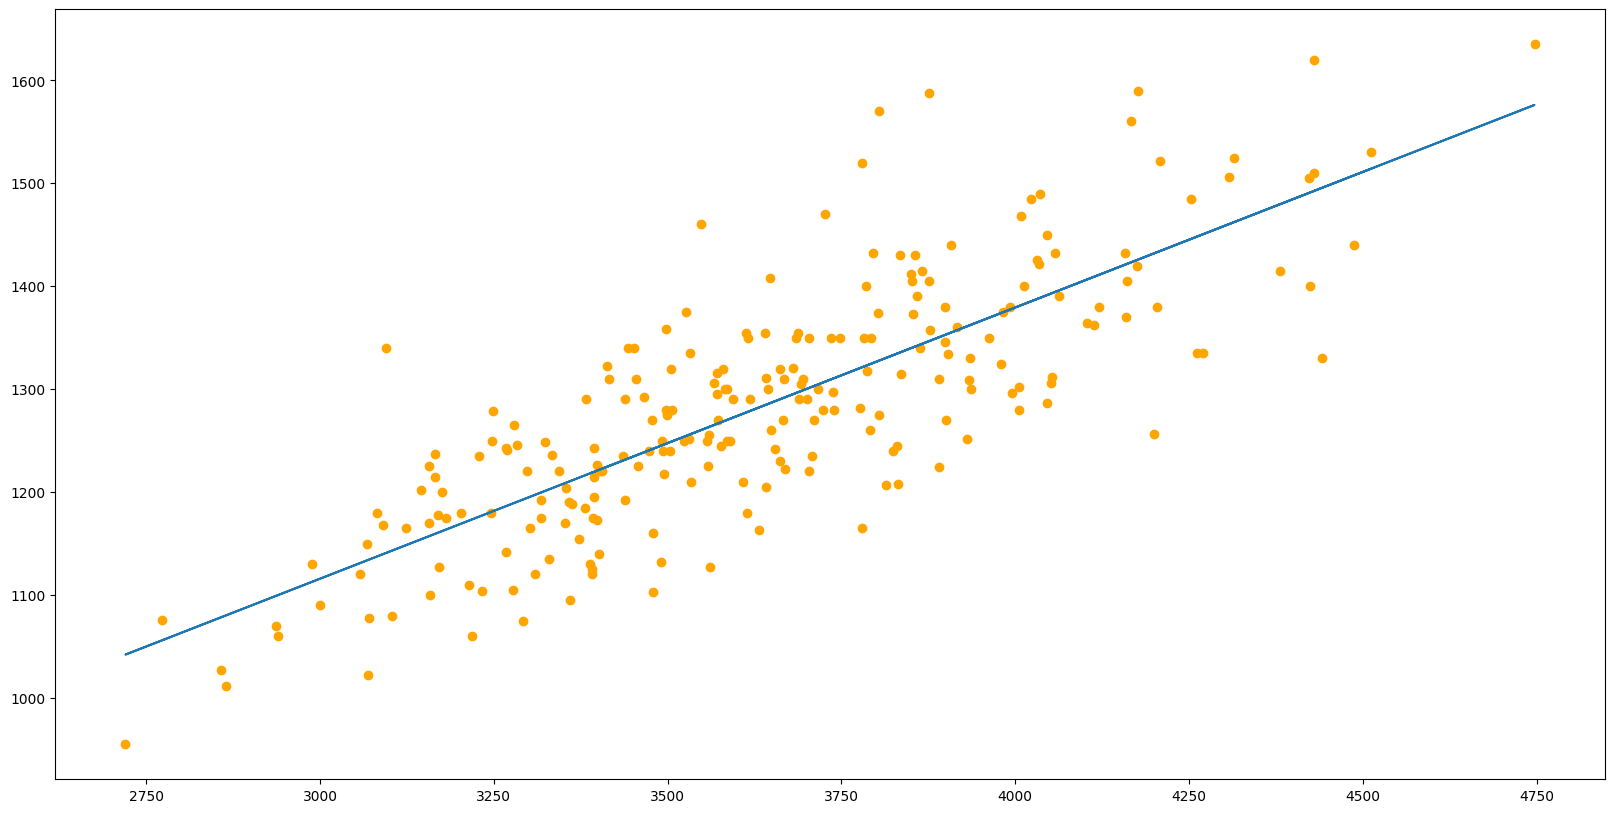

In [30]:
plt.scatter(x, y, c='orange')
plt.plot(x, y_pred)
plt.show()

# Great Job